<a href="https://colab.research.google.com/github/Intelligent07/Codveda_Intership/blob/main/Level_2_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Level 2, Task 1: Regression Analysis ---

Model Coefficient (RM): 9.3483
Model Intercept: -36.2463

Mean Squared Error (MSE): 46.14
R-squared (R2): 0.37


/tmp/ipython-input-3574283940.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/4) house Prediction Data Set.csv', delim_whitespace=True, header=None, names=column_names)


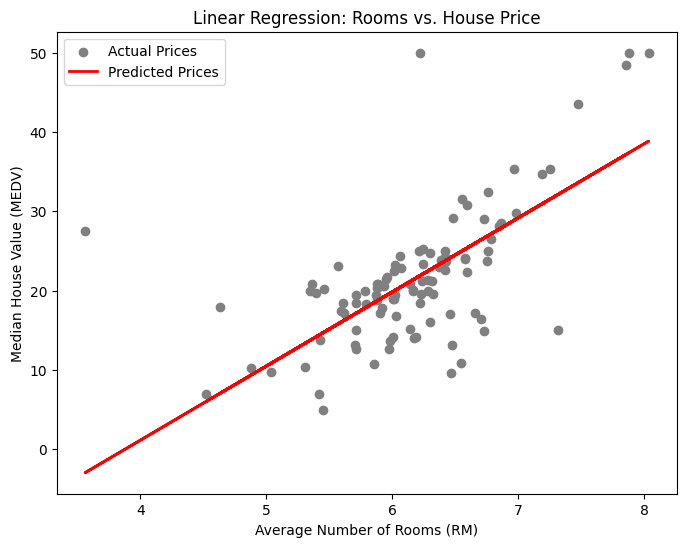



--- Level 2, Task 2: Time Series Analysis ---


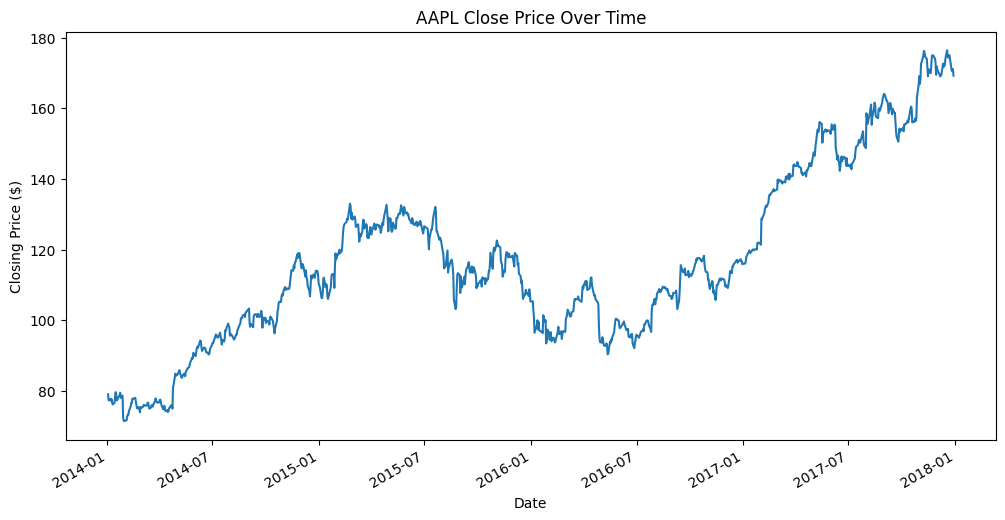

<Figure size 1200x800 with 0 Axes>

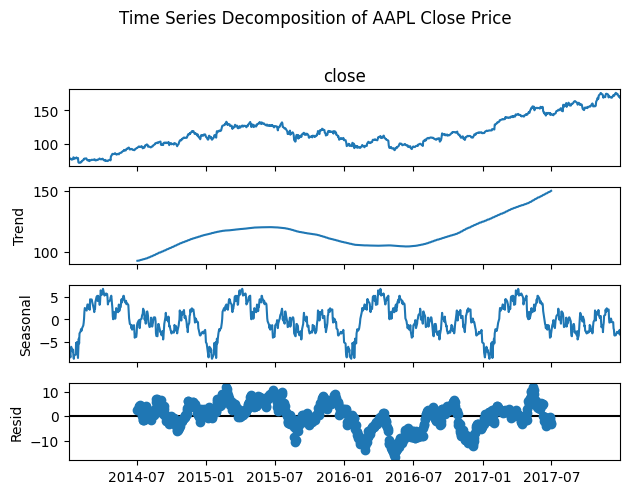

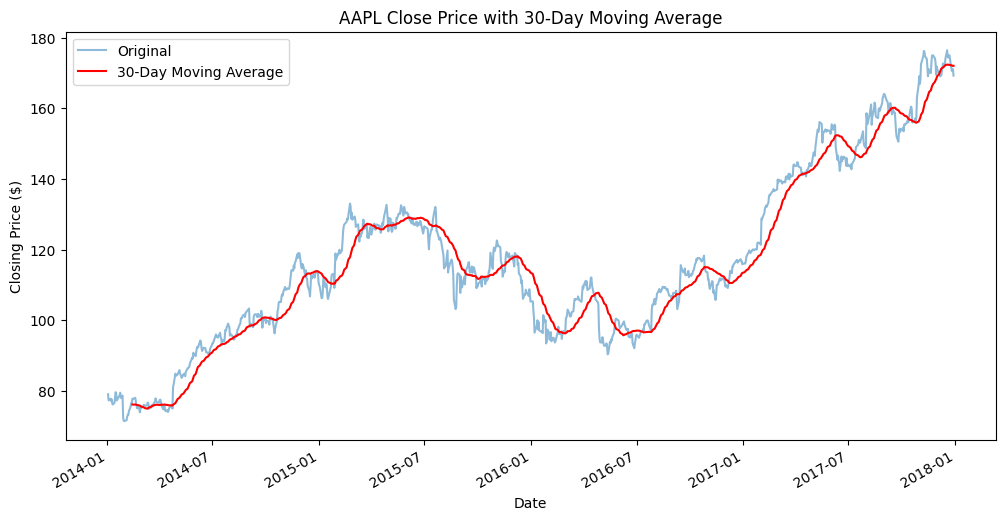



--- Level 2, Task 3: Clustering Analysis (K-Means) ---


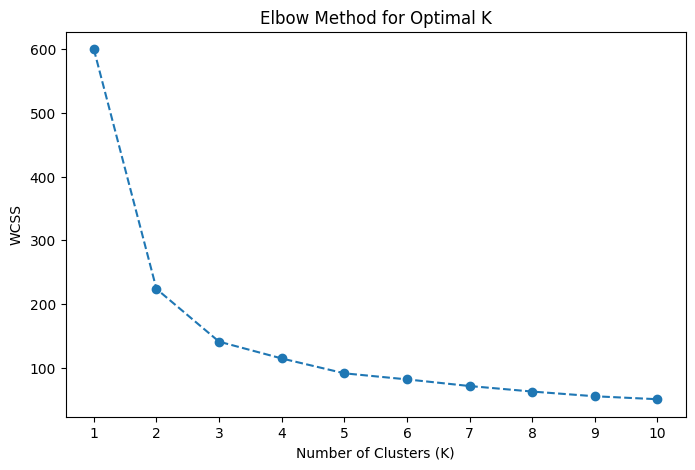

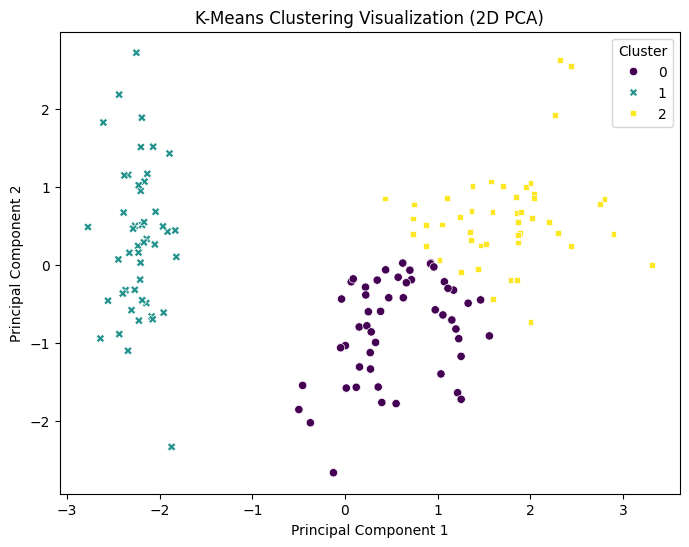

In [ ]:
# level 2 all tasks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Level 2, Task 1: Regression Analysis

def level2_task1_regression_analysis():

    print("--- Level 2, Task 1: Regression Analysis ---")

    # Load the house prediction dataset. The data is space-separated with no headers.
    column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    try:
        df = pd.read_csv('/content/4) house Prediction Data Set.csv', delim_whitespace=True, header=None, names=column_names)
    except FileNotFoundError:
        print("Error: '4) house Prediction Data Set.csv' not found.")
        return

    # We will use 'RM' (average number of rooms) to predict 'MEDV' (median value of homes).
    X = df[['RM']]  # Independent variable
    y = df['MEDV']  # Dependent variable

    # 1. Split the dataset into training and testing sets (80/20 split).
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 2. Fit a linear regression model.
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 3. Interpret coefficients and evaluate the model.
    print(f"\nModel Coefficient (RM): {model.coef_[0]:.4f}")
    print(f"Model Intercept: {model.intercept_:.4f}")

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nMean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # Visualize the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='gray', label='Actual Prices')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
    plt.title('Linear Regression: Rooms vs. House Price')
    plt.xlabel('Average Number of Rooms (RM)')
    plt.ylabel('Median House Value (MEDV)')
    plt.legend()
    plt.show()


# --- Level 2, Task 2: Time Series Analysis ---

def level2_task2_time_series_analysis():
    """
    Task 2: Time Series Analysis
    Objective: Analyze a time-series dataset to detect trends and seasonality.
    This function uses the 'Stock Prices Data Set.csv' for the analysis.
    """
    print("\n\n--- Level 2, Task 2: Time Series Analysis ---")

    try:
        # Load the stock prices dataset and parse the 'date' column.
        df = pd.read_csv('/content/2) Stock Prices Data Set.csv', parse_dates=['date'])
    except FileNotFoundError:
        print("Error: '2) Stock Prices Data Set.csv' not found.")
        return

    # We will analyze a single stock, e.g., 'AAPL'.
    aapl_df = df[df['symbol'] == 'AAPL'].set_index('date').sort_index()
    ts = aapl_df['close']

    # 1. Plot time-series data and identify patterns.
    plt.figure(figsize=(12, 6))
    ts.plot(title='AAPL Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price ($)')
    plt.show()

    # 2. Decompose the series into trend, seasonality, and residuals.
    # We will use a seasonal period of 252 for daily data (trading days in a year).
    decomposition = seasonal_decompose(ts, model='additive', period=252)

    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.suptitle('Time Series Decomposition of AAPL Close Price', y=1.02)
    plt.tight_layout()
    plt.show()

    # 3. Perform moving average smoothing.
    rolling_mean = ts.rolling(window=30).mean()

    plt.figure(figsize=(12, 6))
    ts.plot(label='Original', alpha=0.5)
    rolling_mean.plot(label='30-Day Moving Average', color='red')
    plt.title('AAPL Close Price with 30-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Closing Price ($)')
    plt.legend()
    plt.show()


# --- Level 2, Task 3: Clustering Analysis (K-Means) ---

def level2_task3_clustering_analysis():
    """
    Task 3: Clustering Analysis (K-Means)
    Objective: Implement K-Means clustering to group similar data points together
    based on feature similarities. This function uses the 'iris.csv' dataset.
    """
    print("\n\n--- Level 2, Task 3: Clustering Analysis (K-Means) ---")

    try:
        # Load the Iris dataset.
        df = pd.read_csv('/content/1) iris.csv')
    except FileNotFoundError:
        print("Error: '1) iris.csv' not found.")
        return

    X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

    # 1. Standardize the dataset.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 2. Determine the optimal number of clusters using the Elbow Method.
    wcss = []  # Within-cluster sum of squares
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS')
    plt.xticks(np.arange(1, 11, step=1))
    plt.show()

    # Based on the plot, we'll choose K=3 (as the elbow is typically at K=3 for this dataset).
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    df['cluster'] = clusters

    # 3. Visualize clusters using 2D scatter plots.
    # We will use the first two principal components for a 2D plot.
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    df['PC1'] = X_pca[:, 0]
    df['PC2'] = X_pca[:, 1]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df, palette='viridis', style='cluster')
    plt.title('K-Means Clustering Visualization (2D PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.show()


if __name__ == "__main__":
    level2_task1_regression_analysis()
    level2_task2_time_series_analysis()
    level2_task3_clustering_analysis()